<a href="https://colab.research.google.com/github/Sharif2138/Mobile-App-Regression-Analysis/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In this project, I will build a regression machine learning model for a specific, non-generic real-world use case (Airlines Flights Data).

---



1. Import Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import math

2.Analyse Data

In [69]:

data = pd.read_csv('airlines_flights_data.csv')
data.info()
data.head()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


3. Clean Data

In [70]:
data = data.drop(['index', 'flight','source_city','arrival_time', 'destination_city'], axis=1, errors='ignore')
print(data['stops'].unique())
data['stops'] = data['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)
data.info()

['zero' 'one' 'two_or_more']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   airline         300153 non-null  object 
 1   departure_time  300153 non-null  object 
 2   stops           300153 non-null  int64  
 3   class           300153 non-null  object 
 4   duration        300153 non-null  float64
 5   days_left       300153 non-null  int64  
 6   price           300153 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 16.0+ MB


/tmp/ipython-input-141915586.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['stops'] = data['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)


In [71]:
# Convert to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['airline'], drop_first=True)
data = pd.get_dummies(data, columns=['class'], drop_first=True)
data = pd.get_dummies(data, columns=['departure_time'], drop_first=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  int64  
 1   duration                      300153 non-null  float64
 2   days_left                     300153 non-null  int64  
 3   price                         300153 non-null  int64  
 4   airline_Air_India             300153 non-null  bool   
 5   airline_GO_FIRST              300153 non-null  bool   
 6   airline_Indigo                300153 non-null  bool   
 7   airline_SpiceJet              300153 non-null  bool   
 8   airline_Vistara               300153 non-null  bool   
 9   class_Economy                 300153 non-null  bool   
 10  departure_time_Early_Morning  300153 non-null  bool   
 11  departure_time_Evening        300153 non-null  bool   
 12  departure_time_Late_Night     300153 non-nul

4. Visualise Data

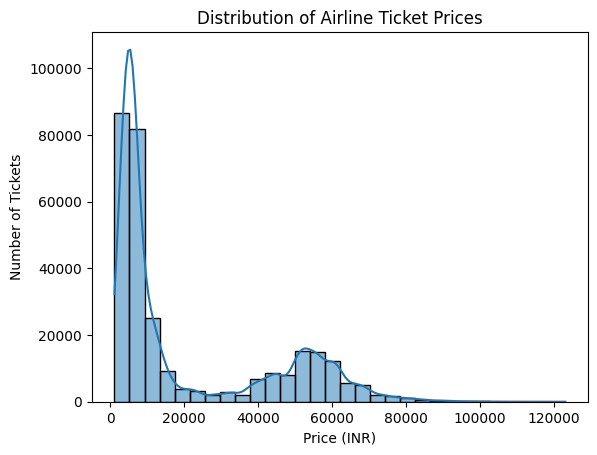

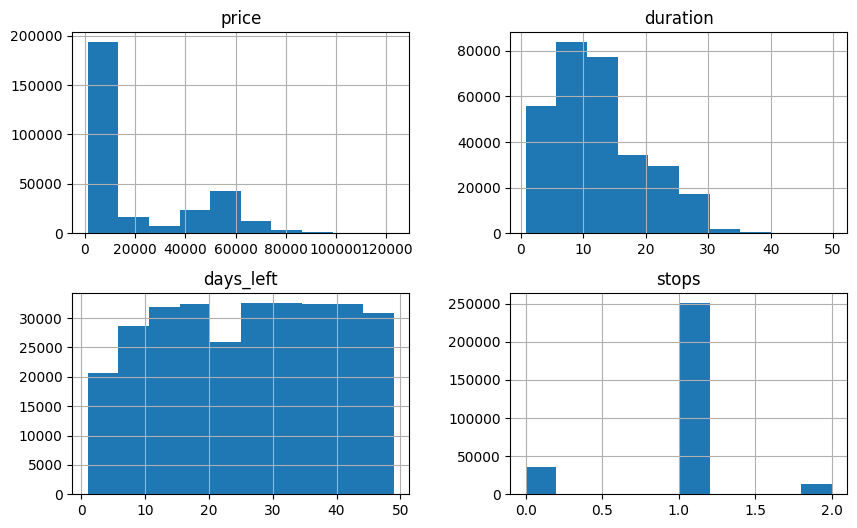

In [72]:
# Histogram of prices
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of Airline Ticket Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Number of Tickets")
plt.show()

#Histograms for numeric variables
data[['price','duration','days_left','stops']].hist(figsize=(10,6))
plt.show()



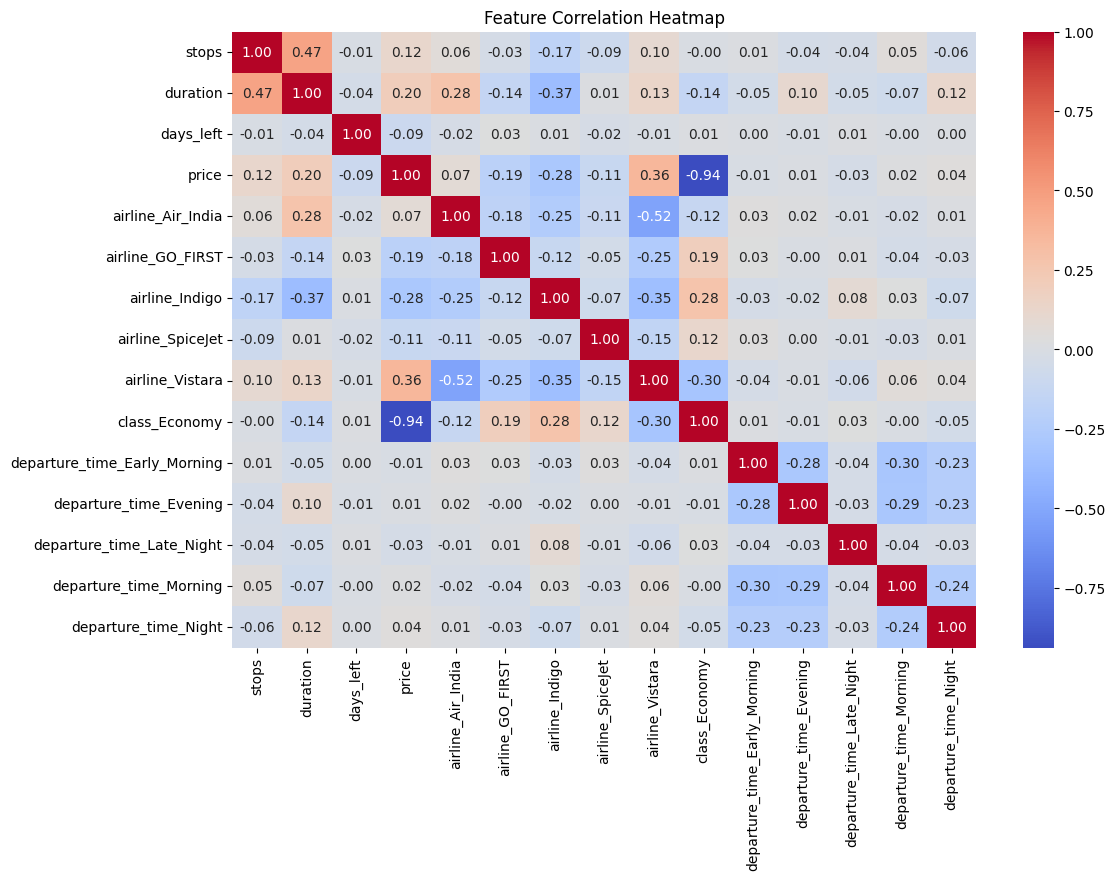

In [77]:
corr_matrix = data.corr() # Calculate the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

5. Split the data

In [93]:
# Separate target and features
X = data.drop('price', axis=1)  # features
y = data['price']               #target

# Split the data int faetures and targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Standardize the data

In [101]:
numeric_features = ['stops', 'duration', 'days_left']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
print

8. Train Linear regression Model

In [107]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 48389007.810024634
Linear Regression R2: 0.9061286676746229


In [110]:
dt = DecisionTreeRegressor(random_state=42)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2:", r2_dt)

Decision Tree MSE: 34265509.89332206
Decision Tree R2: 0.933527277948688


In [111]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)


Random Forest MSE: 26457210.682734694
Random Forest R2: 0.9486748390016174


In [112]:
results = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf
}

best_model_name = max(results, key=results.get)
print("Best Model:", best_model_name)


Best Model: Random Forest


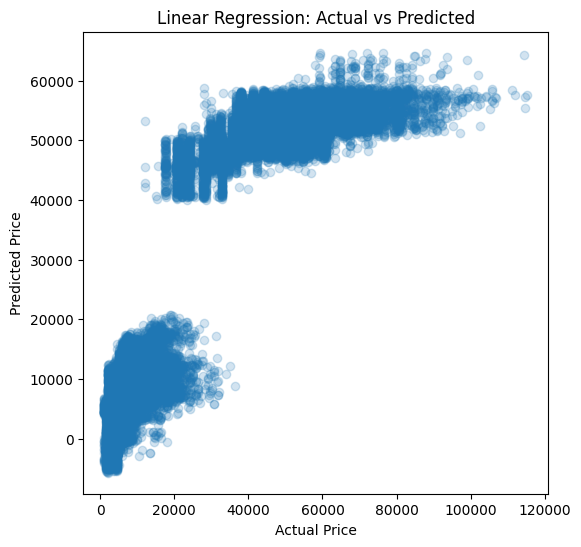

In [113]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [115]:
# Pick best model
if best_model_name == "Linear Regression":
    best_model = lr
elif best_model_name == "Decision Tree":
    best_model = dt
else:
    best_model = rf

# Save model
joblib.dump(best_model, "best_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']